In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

### **1. Choose an image.**

In [ ]:
path = 'path/to/your/folder'
os.chdir(path)

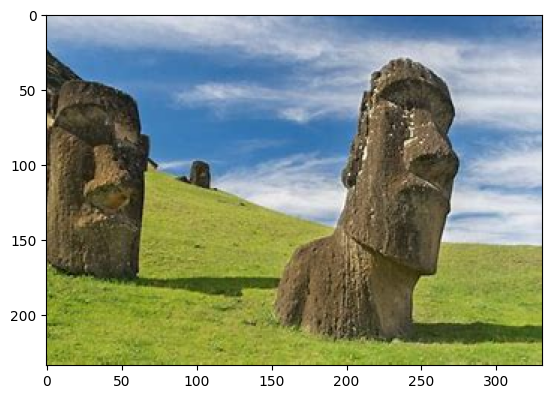

In [3]:
img = cv.imread('easter_island.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

### **2. Explain the concept of "BINS" and its role in creating an image histogram.**  

BINS: Bins are intervals or ranges that divide the entire range of data into a series of contiguous segments. Each bin represents a specific range of values, and the histogram counts the number of data points (or pixels, in the case of an image histogram) that fall within each bin.

Role of Bins in Creating an Image Histogram:    
An image histogram is a graphical representation of the distribution of pixel intensity values in an image. The role of bins in creating an image histogram is to group the pixel intensity values into discrete intervals and count the number of pixels that fall into each interval.

### **3.Why do we need to divide the histogram into "BINS"?**

Dividing a histogram into bins is essential because it enables us to efficiently organize and analyze the distribution of pixel intensity values within an image.

### **4.In the cv.calcHist() function, what do the image, channel, mask, histSize, and range parameters mean?**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

- ranges : this is our RANGE. Normally, it is [0,256].

### **5.Based on the histogram of the image, what comments do you have about the image?**

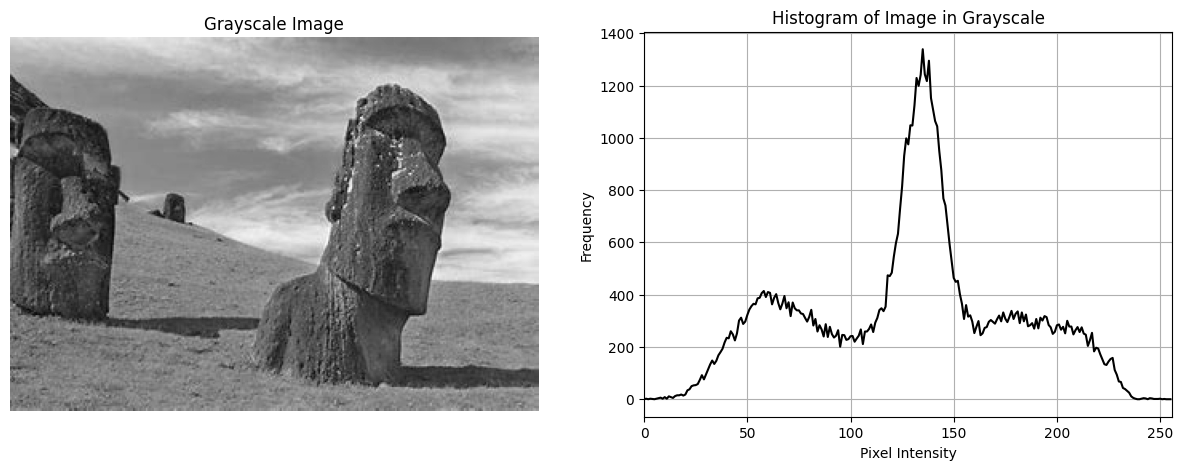

In [4]:
# change image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# calculate histogram
hist = cv.calcHist([img_gray], [0], None, [256], [0, 255])
# plot 
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(hist, color='black')
plt.title('Histogram of Image in Grayscale')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid()
plt.show()

Based on histogram for grayscale image, There are more pixels has value in the range [100,150] than in the remaining bins.

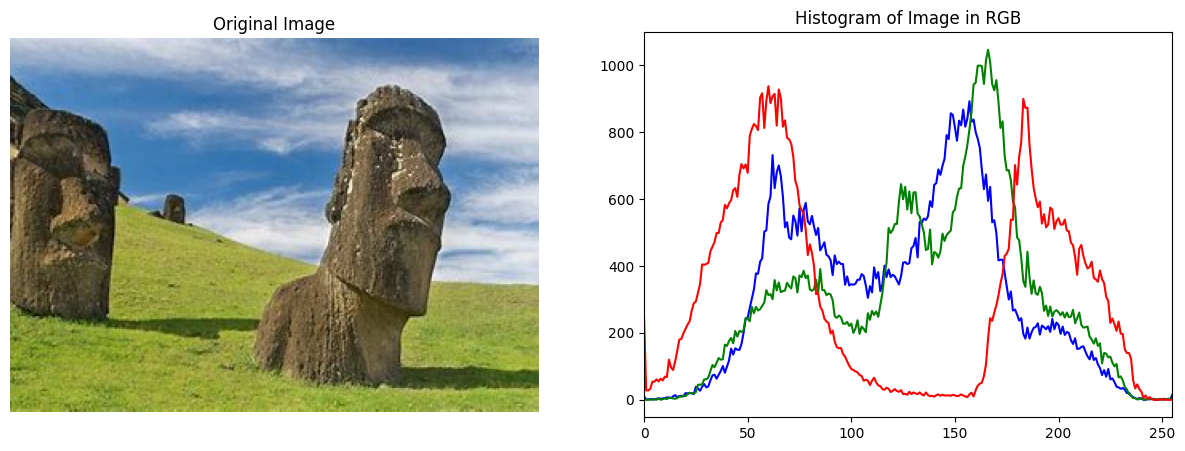

In [5]:
color = ('b', 'g', 'r')
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1) 
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 255])
plt.title('Histogram of Image in RGB')

plt.show()

### **6. Draw a histogram of the image after equalization and compare it with the un-equalized image; what comments do you make?**

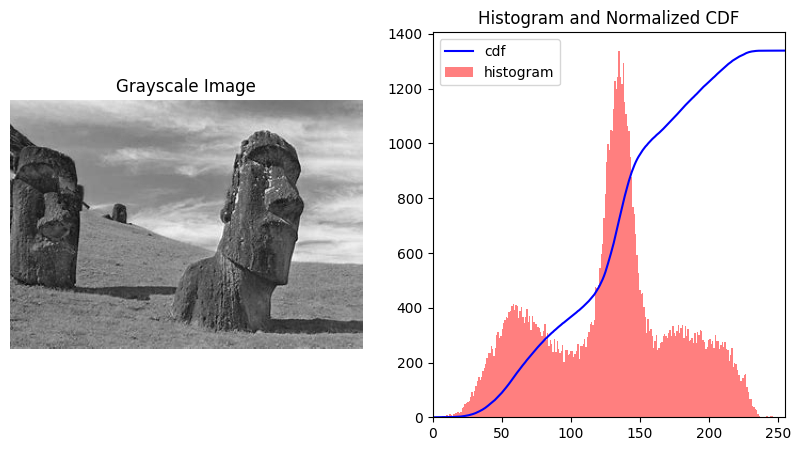

In [6]:
hist, bins = np.histogram(img_gray.ravel(), 256, [0, 255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# plot grayscale image
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

#plot histogram and normalized cdf
plt.subplot(1,2,2)
plt.plot(cdf_normalized, color='b')
plt.hist(img_gray.flatten(), 256, [0, 255], color='r', alpha=0.5)
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram and Normalized CDF')

plt.show()

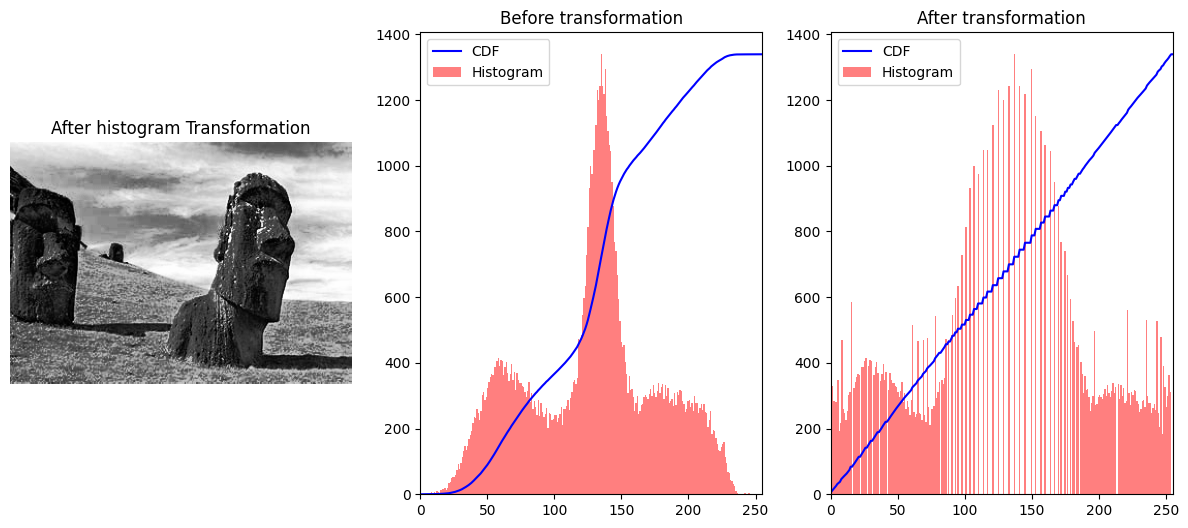

In [7]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img_gray2 = cdf[img_gray]

hist, bins = np.histogram(img_gray2.flatten(), 256, [0, 255])
cdf = hist.cumsum()
cdf_normalized2 = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_gray2, cmap='gray')  
plt.title("After histogram Transformation")  
plt.axis('off')  

plt.subplot(1, 3, 2)
plt.plot(cdf_normalized, color='blue')  
plt.hist(img_gray.flatten(), 256, [0, 255], color='red', alpha=0.5)  
plt.xlim([0, 255])  
plt.legend(('CDF', 'Histogram'), loc='upper left')  
plt.title("Before transformation") 

plt.subplot(1, 3, 3)
plt.plot(cdf_normalized2, color='blue')  
plt.hist(img_gray2.flatten(), 256, [0, 255], color='red', alpha=0.5)  
plt.xlim([0, 255])  
plt.legend(('CDF', 'Histogram'), loc='upper left')  
plt.title("After transformation")  

plt.show()

After histogram equalization, the histogram is spread more evenly across the intensity range, with pixel counts in each bin appearing more uniformly distributed compare to the histogram before applying transformation.

The CDF after transformation is nearly linear, indicating a balanced distribution of intensities. This linear CDF suggests that the cumulative distribution of pixel intensities now increases more consistently across the intensity range, with no single region dominating.

### **7. Using your intuition when comparing the image after equalization with the original image, give your comments.**

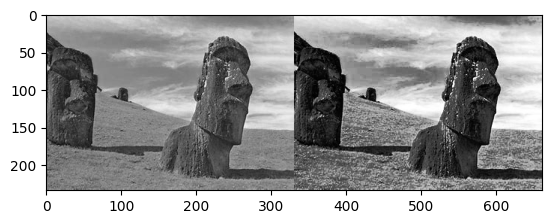

In [18]:
equ = cv.equalizeHist(img_gray)
res = np.hstack((img_gray, equ))
plt.imshow(res, cmap='gray')

The picture after equalization has some region that is too dark, it makes these image areas very difficult to observe.  
So we can use the following two ways to process the image

<h4>Application of Mask</h4>

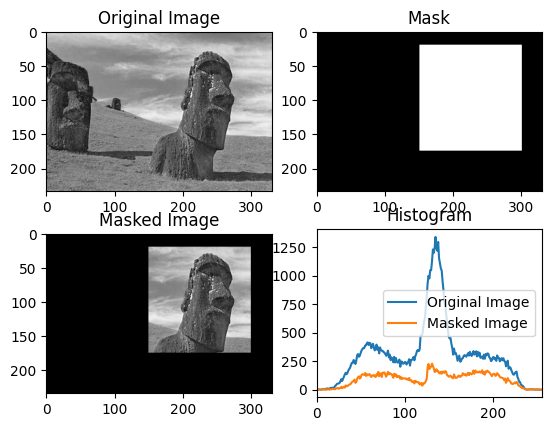

In [16]:
mask = np.zeros(img_gray.shape[:2], np.uint8)
mask[20:175, 150:300] = 255 
masked_img = cv.bitwise_and(img_gray, img_gray, mask=mask)
hist_masked = cv.calcHist([img_gray], [0], mask, [256], [0, 255])
hist_full = cv.calcHist([img_gray], [0], None, [256], [0, 255])

plt.subplot(221), plt.imshow(img_gray, 'gray')
plt.title('Original Image')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.title('Mask')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.title('Masked Image')
plt.subplot(224), 
plt.plot(hist_full, label='Original Image')
plt.plot(hist_masked, label='Masked Image')
plt.xlim([0, 256])
plt.legend()
plt.title('Histogram')

plt.show()

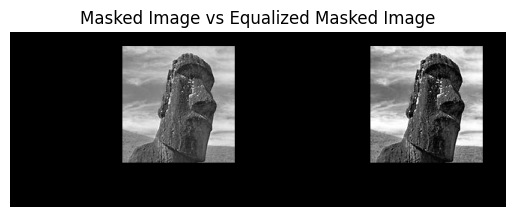

In [15]:
equ_mask = cv.equalizeHist(masked_img)
res = np.hstack((masked_img, equ_mask))  
plt.imshow(res, cmap="gray")  
plt.title("Masked Image vs Equalized Masked Image") 
plt.axis('off')  
plt.show()

<h4>CLAHE</h4>

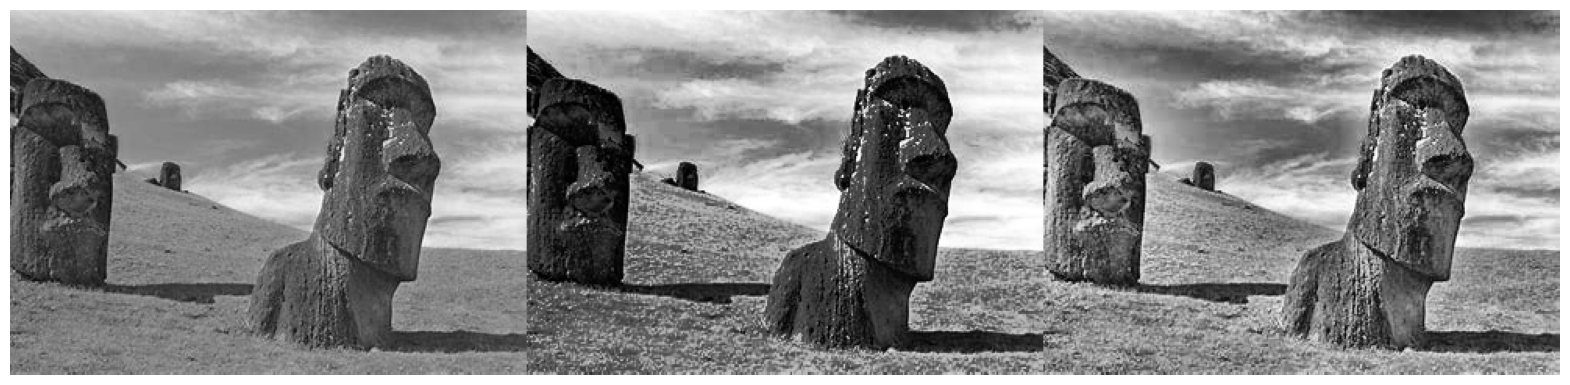

In [19]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img_gray)
res = np.hstack((img_gray, equ, cl1))
plt.figure(figsize=(20,20))
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()